In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.stattools import adfuller
plt.rcParams['font.size'] = 15

In [87]:
df_main = pd.read_csv('20181214_FinalMainAndTurn.csv')
df_main.head()

,Unnamed: 0,index,Date,Station,Weekday,Maintenance,EntryGain,Entries,Mean,Std,Score,Std1
0,0,0,2016-08-27,G08,5,0,0,14346.0,NaN,NaN,NaN,3499.426694
1,1,1,2016-09-03,G08,5,0,0,14854.0,16335.833333,1451.473102,-0.423450,3499.426694
2,2,2,2016-09-10,G08,5,0,0,16677.0,16591.714286,1487.941723,0.024371,3499.426694
3,3,3,2016-09-17,G08,5,0,0,18175.0,16709.750000,1417.444355,0.418711,3499.426694
4,4,4,2016-09-24,G08,5,0,0,17133.0,16663.111111,1333.259769,0.134276,3499.426694


### Plot AD Fuller Test Statistics

In [ ]:
df_entries = pd.DataFrame()
df_score = pd.DataFrame()
for i in df_main['Station'].unique():
    for j in df_main['Weekday'].unique():
        df_temp = df_main.loc[(df_main['Station']==i) & (df_main['Weekday']==j), ['Date','Score'] ]
        df_temp.index = df_temp['Date']
        df_temp.drop(['Date'], axis=1, inplace=True)
        df_temp.dropna(inplace=True)
        try:
            dftest = adfuller(df_temp['Score'], autolag='AIC')
            dfoutput = pd.DataFrame( columns =['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
            dfoutput.loc[0,:]=dftest[0:4]
            for key,value in dftest[4].items():
                dfoutput['Critical Value (%s)'%key] = value
            dfoutput['Station'] = i
            dfoutput['Weekday'] = j
            df_score = df_score.append(dfoutput)
            del df_temp
            del dfoutput
        except:
            print("Error: ", i, " ",j," Score")
            
        df_temp = df_main.loc[(df_main['Station']==i) & (df_main['Weekday']==j), ['Date','Entries'] ]
        df_temp.index = df_temp['Date']
        df_temp.drop(['Date'], axis=1, inplace=True)
        df_temp.dropna(inplace=True)
        try:
            dftest = adfuller(df_temp['Entries'], autolag='AIC')
            dfoutput = pd.DataFrame( columns =['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
            dfoutput.loc[0,:]=dftest[0:4]
            for key,value in dftest[4].items():
                dfoutput['Critical Value (%s)'%key] = value
            dfoutput['Station'] = i
            dfoutput['Weekday'] = j
            df_entries = df_entries.append(dfoutput)
            del df_temp
            del dfoutput
        except:
            print("Error: ", i, " ",j," Entries")

        

In [ ]:
fig = plt.subplots(figsize=(16,5))

plt.subplot(1,2,1)
plt.hist(df_entries['Test Statistic'],bins=20, edgecolor='blue', color='white', linewidth=2.0)
colors = ['green','yellow','red']
a=0
for i in ['Critical Value (1%)','Critical Value (5%)', 'Critical Value (10%)']:
    plt.axvline(x=df_entries[i].mean(), label =i, color =colors[a], linewidth=3.0 )
    a=a+1
plt.legend(fontsize=12)
plt.title("Before Time Series Treatment", fontsize=15)
plt.xlabel("AD Fuller Test Statistics", fontsize=14)

plt.subplot(1,2,2)
plt.hist(df_score['Test Statistic'],bins=20, edgecolor='blue', color='white', linewidth=2.0)
a=0
for i in ['Critical Value (1%)','Critical Value (5%)', 'Critical Value (10%)']:
    plt.axvline(x=df_score[i].mean(), label =i, color =colors[a] , linewidth=3.0 )
    a=a+1
plt.legend(fontsize=12)
plt.title("After Time Series Treatment", fontsize=15)
plt.xlabel("AD Fuller Test Statistics", fontsize=14)

plt.savefig("ADF Test.png")

In [88]:
myarray0 = df_main.loc[df_main['Maintenance']==0,'Score'].dropna()
myarray0 = myarray0[(myarray0 > myarray0.quantile(.05))&(myarray0 < myarray0.quantile(.95))]
np.mean(myarray0), np.std(myarray0), np.min(myarray0), np.max(myarray0)

(0.05023715205163775,
 0.6612517996654769,
 -1.7349385583688051,
 1.4481387280119096)

In [96]:
myarray.describe()

count    1101.000000
mean       -0.542577
std         0.865789
min        -2.373871
25%        -1.243665
50%        -0.421273
75%         0.145492
max         1.134242
Name: Score, dtype: float64

In [95]:
myarray = df_main.loc[df_main['Maintenance']>0,'Score'].dropna()
myarray = myarray[(myarray > myarray.quantile(.05))&(myarray < myarray.quantile(.95))]
np.mean(myarray), np.std(myarray), np.min(myarray), np.max(myarray)

(-0.5425770812869731,
 0.8653959481068094,
 -2.3738708760142844,
 1.1342418250493531)

In [91]:
myarray1 = df_main.loc[(df_main['Maintenance']>0) & (df_main['EntryGain']==0),'Score'].dropna()
myarray1 = myarray1[(myarray1 > myarray1.quantile(.05))&(myarray1 < myarray1.quantile(.95))]
np.mean(myarray1), np.std(myarray1), np.min(myarray1), np.max(myarray1)

(-0.7122170085309956,
 0.8734743626497613,
 -2.5243065644482594,
 0.84723399622101203)

In [92]:
myarray2 = df_main.loc[(df_main['Maintenance']>0) & (df_main['EntryGain']>0),'Score'].dropna()
myarray2 = myarray2[(myarray2 > myarray2.quantile(.05))&(myarray2 < myarray2.quantile(.95))]
np.mean(myarray2), np.std(myarray2), np.min(myarray2), np.max(myarray2)

(0.07290100510875712,
 0.6445589890838641,
 -1.3080770048389208,
 1.5346550448475984)

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
ttest_ind(myarray0, myarray2, axis=0, equal_var=True)

### Plot Hist Maintenance and Normal

In [ ]:
plt.subplots(figsize= (14,5))

plt.subplot(1,2,1)
myarray = df_main.loc[df_main['Maintenance']==0,'Score'].dropna()
myarray = myarray[(myarray > myarray.quantile(.05))&(myarray < myarray.quantile(.95))]
plt.hist(myarray, color='blue', bins=20, edgecolor='black', linewidth=1.0)
plt.axvline(x=myarray.quantile(q= 0.25), linewidth=3.0, label ='25%', color ='red', linestyle ='--') 
plt.axvline(x=np.mean(myarray), linewidth=3.0, label ='Mean', color = 'red' )
plt.axvline(x=myarray.quantile(q= 0.75), linewidth=3.0, label ='75%', color ='red', linestyle ='--')
plt.xlabel('Rolling window standardized z-score of Station Entries')
plt.title('Station Dates without Maintenance')
plt.legend()

plt.subplot(1,2,2)
myarray = df_main.loc[df_main['Maintenance']>0,'Score'].dropna()
myarray = myarray[(myarray > myarray.quantile(.05))&(myarray < myarray.quantile(.95))]
plt.hist(myarray, color='red', bins=20, edgecolor='black', linewidth=1.0)
plt.axvline(x=myarray.quantile(q= 0.25), linewidth=3.0, label ='25%', color ='Blue', linestyle ='--') 
plt.axvline(x=np.mean(myarray), linewidth=3.0, label ='Mean', color = 'Blue' )
plt.axvline(x=myarray.quantile(q= 0.75), linewidth=3.0, label ='75%', color ='Blue', linestyle ='--')
plt.xlabel('Rolling window standardized z-score of Station Entries')
plt.title('Station Dates with Maintenance')
plt.legend()

plt.savefig('MaintenanceNormal.png')

### Plot Hist Maintenance, Normal and Entry Gain

In [ ]:
plt.subplots(figsize= (20,5))

plt.subplot(1,3,1)
myarray = df_main.loc[(df_main['Maintenance']>0) & (df_main['EntryGain']==0),'Score'].dropna()
myarray = myarray[(myarray > myarray.quantile(.05))&(myarray < myarray.quantile(.95))]
plt.hist(myarray, color='red', bins=20, edgecolor='black', linewidth=1.0)
plt.axvline(x=myarray.quantile(q= 0.25), linewidth=3.0, label ='25%', color ='lime', linestyle ='--') 
plt.axvline(x=np.mean(myarray), linewidth=3.0, label ='Mean', color = 'lime' )
plt.axvline(x=myarray.quantile(q= 0.75), linewidth=3.0, label ='75%', color ='lime', linestyle ='--')
plt.title('Station Dates with Maintenance')
plt.yticks([])
plt.legend()

plt.subplot(1,3,2)
myarray = df_main.loc[df_main['Maintenance']==0,'Score'].dropna()
myarray = myarray[(myarray > myarray.quantile(.05))&(myarray < myarray.quantile(.95))]
plt.hist(myarray, color='royalblue', bins=20, edgecolor='black', linewidth=1.0)
plt.axvline(x=myarray.quantile(q= 0.25), linewidth=3.0, label ='25%', color ='orange', linestyle ='--') 
plt.axvline(x=np.mean(myarray), linewidth=3.0, label ='Mean', color = 'orange' )
plt.axvline(x=myarray.quantile(q= 0.75), linewidth=3.0, label ='75%', color ='orange', linestyle ='--')
plt.xlabel('Rolling window standardized z-score of Station Entries')
plt.title('Station Dates without Maintenance')
plt.yticks([])
plt.legend()

plt.subplot(1,3,3)
myarray = df_main.loc[(df_main['Maintenance']>0) & (df_main['EntryGain']>0),'Score'].dropna()
myarray = myarray[(myarray > myarray.quantile(.05))&(myarray < myarray.quantile(.95))]
plt.hist(myarray, color='lime', bins=20, edgecolor='black', linewidth=1.0)
plt.axvline(x=myarray.quantile(q= 0.25), linewidth=3.0, label ='25%', color ='red', linestyle ='--') 
plt.axvline(x=np.mean(myarray), linewidth=3.0, label ='Mean', color = 'red' )
plt.axvline(x=myarray.quantile(q= 0.75), linewidth=3.0, label ='75%', color ='red', linestyle ='--')
plt.title('Station Dates with Maintenance and EntryGain')
plt.yticks([])
plt.legend()
plt.savefig('MaintenanceNormalEntryGain.png')

# Plot of Results

In [7]:
df_typeLoss = pd.read_csv("Results2.csv")
df_typeLoss = df_typeLoss.sort_values(by = '% of Total Loss', ascending=False)
df_typeLoss

,Unnamed: 0,Type,Loss,% of Total Loss
2,0,Signal,-648585.374603,50.900543
0,0,Track,-407285.345238,31.963479
4,0,Electrical,-88665.222222,6.958387
1,0,StationImp,-65586.396825,5.147176
3,0,Structural,-64098.597222,5.030415


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


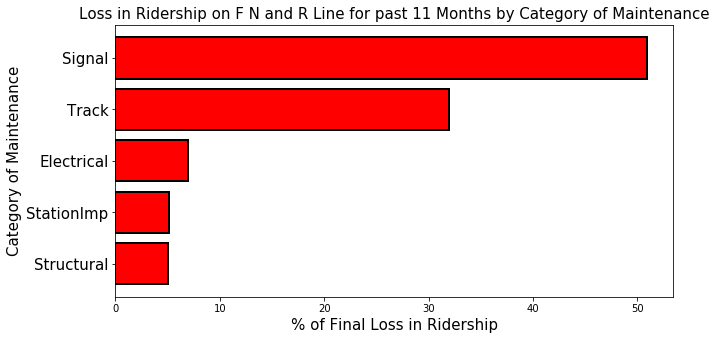

In [84]:
fig, ax = plt.subplots(figsize=(10,5))
lis =  np.arange(len(df_typeLoss))
ax.barh(lis, np.abs(df_typeLoss['% of Total Loss']), color= 'red',edgecolor='black', linewidth=2.0)
ax.set_yticks(lis)
ax.set_yticklabels(list(df_typeLoss['Type']), fontsize =15)
ax.invert_yaxis()
plt.ylabel('Category of Maintenance', fontsize =15)
plt.xlabel('% of Final Loss in Ridership', fontsize =15)
plt.title('Loss in Ridership on F N and R Line for past 11 Months by Category of Maintenance', fontsize =15)
plt.legend(fontsize =15)
plt.savefig("CategoricalLoss.png")

In [22]:
df_lineTypeLoss = pd.read_csv("Results3.csv")
df_lineTypeLoss.head()

,Unnamed: 0,Line,Type,Loss,% of Line,% of Type
0,0,F,Track,50677.222222,7.171657,9.084642
1,0,N,Track,310535.678571,63.479892,55.668115
2,0,R,Track,196621.111111,64.386349,35.247243
3,0,F,StationImp,809.555556,0.114565,1.040257
4,0,N,StationImp,42581.507937,8.704538,54.716108


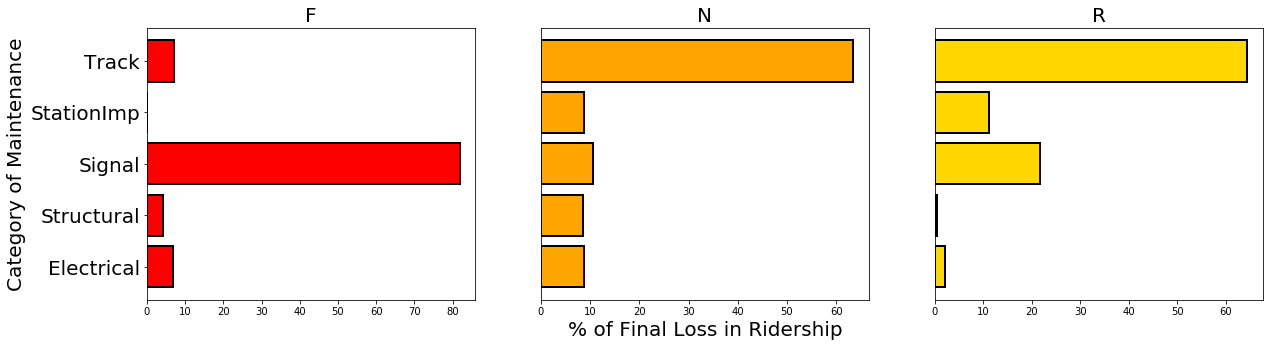

In [86]:
plt.subplots(figsize=(20,5))
a = 1
colors = ['','red','orange','gold']
for i in ['F','N','R']:
    df_plot = df_lineTypeLoss[df_lineTypeLoss['Line']==i]
    lis =  np.arange(len(df_plot))
    ax = plt.subplot(1,3,a)
    ax.barh(lis, np.abs(df_plot['% of Line']),edgecolor='black', linewidth=2.0, color = colors[a])
    if a == 1:
        ax.set_yticks(lis)
        ax.set_yticklabels(list(df_plot['Type']), fontsize =20)
        plt.ylabel('Category of Maintenance', fontsize =20)
    else: 
        ax.set_yticks([])
    ax.invert_yaxis()
    plt.title(i, fontsize = 20)
    if a == 2:
        plt.xlabel('% of Final Loss in Ridership', fontsize =20)
        
    a = a + 1


plt.savefig("LineCategoricalLoss.png")

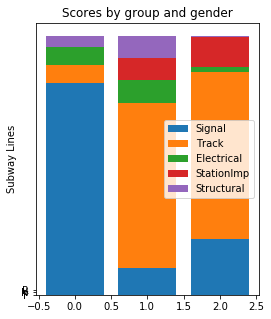

In [61]:
plt.subplots(figsize=(4,5))
lefts =pd.DataFrame(np.array([0,0,0]))
for i in ['Signal', 'Track', 'Electrical', 'StationImp', 'Structural']:
    df_plot = df_lineTypeLoss[df_lineTypeLoss['Type']==i]
    ind = np.arange(len(df_plot))    # the x locations for the groups
    p1 = plt.bar(ind, df_plot['% of Line'], bottom = np.array(lefts), label = i)
    lefts = pd.concat([lefts,df_plot['% of Line'].reset_index(drop=True)], axis=1)
    lefts = pd.DataFrame(np.sum(lefts, axis=1))
    
plt.ylabel('Subway Lines')
plt.title('Scores by group and gender')
plt.yticks(ind, ('F', 'N', 'R'))
plt.legend()

plt.show()

In [49]:
lefts

,0
0,7.171657
1,63.479892
2,64.386349
6,81.793660
7,10.543028
8,21.748495


,% of Line,% of Line
9,4.173638,4.173638
10,8.464898,8.464898
11,0.557853,0.557853


,0
9,8.347277
10,16.929797
11,1.115706


### Plot Month on Month Loss

In [ ]:
df_lossMonth = pd.read_csv('20181214_LossMonth.csv')
df_lossMonth

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
lis =  np.arange(len(df_lossMonth))
ax.bar(lis, np.abs(df_lossMonth['Loss']), color= 'royalblue',edgecolor='black', linewidth=2.0)
ax.set_xticks(lis)
ax.set_xticklabels(('2017-11', '2017-12', '2018-1', '2018-2', '2018-3', '2018-4', '2018-5', '2018-6', '2018-7', '2018-8', '2018-9'))
plt.axhline(abs(df_lossMonth['Loss'].mean()), color='r', label= 'Mean Loss', linewidth=3.0)
plt.axhline(abs(df_lossMonth['Loss'].quantile(0.25)), color='orange', label= '75 Percentile', linestyle ='--', linewidth=3.0)
plt.xlabel('Month-Year')
plt.ylabel('Loss in Ridership')
plt.title('Loss in Ridership on F N and R Line for past 11 Months')
plt.legend()

In [ ]:
df_lossMonth['%Loss'] =df_lossMonth['Loss']*100/df_lossMonth['Entries']

In [ ]:
df_lossMonth

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
lis =  np.arange(len(df_lossMonth))
ax.plot(lis, np.abs(df_lossMonth['%Loss']), '-', color= 'royalblue', linewidth=4.0, marker='o', ms=10.0, mfc='black')
ax.set_xticks(lis)
ax.set_xticklabels(('2017-11', '2017-12', '2018-1', '2018-2', '2018-3', '2018-4', '2018-5', '2018-6', '2018-7', '2018-8', '2018-9'))
plt.axhline(abs(df_lossMonth['%Loss'].mean()), color='r', label= 'Mean Loss', linewidth=3.0)
plt.axhline(abs(df_lossMonth['%Loss'].quantile(0.25)), color='orange', label= '75 Percentile', linestyle ='--', linewidth=3.0)
plt.xlabel('Month-Year')
plt.ylabel('% Loss in Ridership')
plt.title('% Loss in Ridership on F N and R Line for past 11 Months')
plt.legend()


### Plot Line Loss

In [ ]:
df_lineLoss = pd.read_csv('20181214_monthLine.csv')
df_lineLoss

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
lis =  np.arange(len(df_lossMonth))
ax.bar(lis, np.abs(df_lossMonth['Loss']), color= 'royalblue',edgecolor='black', linewidth=2.0)
ax.set_xticks(lis)
ax.set_xticklabels(('2017-11', '2017-12', '2018-1', '2018-2', '2018-3', '2018-4', '2018-5', '2018-6', '2018-7', '2018-8', '2018-9'))
plt.axhline(abs(df_lossMonth['Loss'].mean()), color='r', label= 'Mean Loss', linewidth=3.0)
plt.axhline(abs(df_lossMonth['Loss'].quantile(0.25)), color='orange', label= '75 Percentile', linestyle ='--', linewidth=3.0)
plt.xlabel('Month-Year')
plt.ylabel('Loss in Ridership')
plt.title('Loss in Ridership on F N and R Line for past 11 Months')
plt.legend()